<a href="https://colab.research.google.com/github/snehaangeline/Lora/blob/main/LSTM_lora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==1.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#import yfinance as yf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM,Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/sample_data/predictdatatlora.csv')
df

,SNR,SPREADING FACTOR
0,-3.8,11
1,-4.3,11
2,-3.0,7
3,-7.0,12
4,-10.8,11
...,...,...
617,-8.3,8
618,-2.5,12
619,-11.3,11
620,-11.5,10


In [ ]:
df.isnull().sum()

SNR                 0
SPREADING FACTOR    0
dtype: int64

In [ ]:
X = pd.DataFrame(np.c_[df['SNR']], columns = ['SNR']).values
Y = df['SPREADING FACTOR'].values

In [ ]:
# Split train data to X and y
X_train = train_dataset.drop('SPREADING FACTOR', axis = 1)
y_train = train_dataset.loc[:,['SPREADING FACTOR']]# Split test data to X and y
X_test = test_dataset.drop('SNR', axis = 1)
y_test = test_dataset.loc[:,['SNR']]

In [ ]:
# Different scaler for input and output
scaler_X = MinMaxScaler(feature_range = (0,1))
scaler_Y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_X.fit(X_train)
output_scaler = scaler_Y.fit(y_train)
# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)
# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- SNR
Feature names seen at fit time, yet now missing:
- SPREADING FACTOR

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- SPREADING FACTOR
Feature names seen at fit time, yet now missing:
- SNR

  warnings.warn(message, FutureWarning)


In [ ]:
# Create a 3D input
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)
TIME_STEPS = 30
X_test, y_test = create_dataset(test_x_norm, test_y_norm,
                                TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm,
                                  TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_train.shape)

X_train.shape:  (95, 30, 1)
y_train.shape:  (467, 1)
X_test.shape:  (95, 30, 1)
y_test.shape:  (467, 1)


In [ ]:
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
#Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
model_lstm = create_model(64, LSTM)

In [ ]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,
                        validation_split = 0.2, batch_size = 32,
                        shuffle = False, callbacks = [early_stop])
    return history

history_lstm = fit_model(model_lstm)


Epoch 1/100
12/12 [==============================] - 6s 136ms/step - loss: 0.1866 - val_loss: 0.1205
Epoch 2/100
12/12 [==============================] - 1s 42ms/step - loss: 0.1358 - val_loss: 0.1158
Epoch 3/100
12/12 [==============================] - 0s 41ms/step - loss: 0.1289 - val_loss: 0.1214
Epoch 4/100
12/12 [==============================] - 1s 44ms/step - loss: 0.1258 - val_loss: 0.1149
Epoch 5/100
12/12 [==============================] - 1s 45ms/step - loss: 0.1298 - val_loss: 0.1190
Epoch 6/100
12/12 [==============================] - 1s 44ms/step - loss: 0.1292 - val_loss: 0.1172
Epoch 7/100
12/12 [==============================] - 1s 43ms/step - loss: 0.1302 - val_loss: 0.1160
Epoch 8/100
12/12 [==============================] - 1s 45ms/step - loss: 0.1284 - val_loss: 0.1167
Epoch 9/100
12/12 [==============================] - 0s 41ms/step - loss: 0.1289 - val_loss: 0.1180
Epoch 10/100
12/12 [==============================] - 1s 44ms/step - loss: 0.1288 - val_loss: 0.116

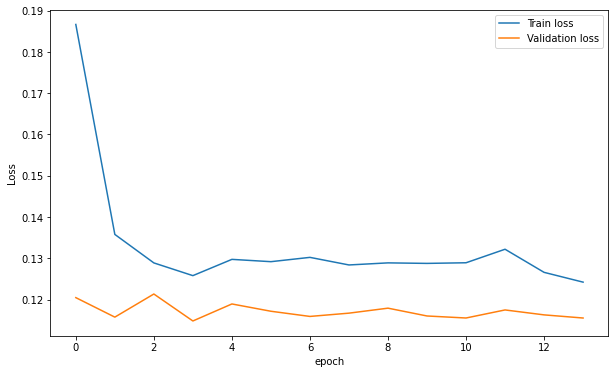

In [ ]:
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')

plot_loss (history_lstm)


In [ ]:
y_test = scaler_Y.inverse_transform(y_test)
y_train = scaler_Y.inverse_transform(y_train)

In [ ]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_Y.inverse_transform(prediction)
    return prediction

prediction_lstm = prediction(model_lstm)


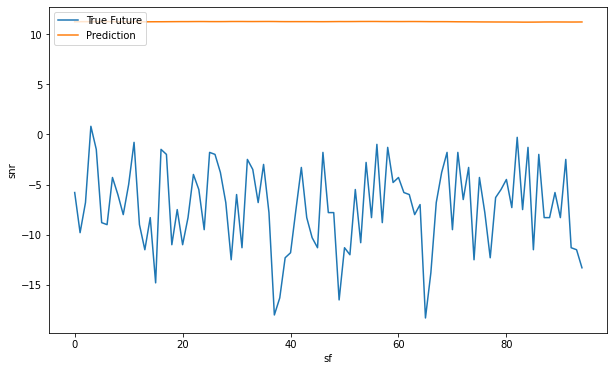

In [ ]:
# Plot true future vs prediction
def plot_future(prediction, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test),
             label='True Future')
    plt.plot(np.arange(range_future),np.array(prediction),
            label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('sf')
    plt.ylabel('snr')

plot_future(prediction_lstm, y_test)


In [ ]:

#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_error

In [ ]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse= np.square(errors).mean()
    rmse= np.sqrt(mse)
    #mae = np.abs(errors).mean()
    mae = np.mean(abs(errors))
    r2 = 1-(sum(errors**2)/sum((actual-np.mean(actual))**2))

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print(r2)
evaluate_prediction(prediction_lstm, y_test, 'LSTM')

LSTM:
Mean Absolute Error: 18.4367
Root Mean Square Error: 18.9051
[-19.44612746]


[*********************100%***********************]  1 of 1 completed


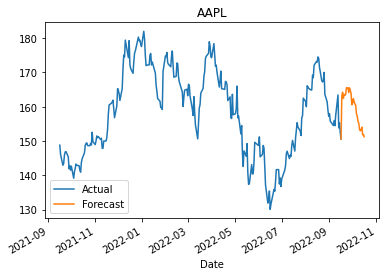

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
tf.random.set_seed(0)

# download the data
df = yf.download(tickers=['AAPL'], period='1y')
y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

# generate the input and output sequences
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30  # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.plot(title='AAPL')